In [1]:
import sys
import os

# Go up one directory from the current notebook location
project_root = os.path.abspath("../")
sys.path.append(project_root)

In [2]:
from src.data import load_data
from src.data import process_data
from src.data.load_data import load_data
from src.data.process_data import preproces
import importlib

In [3]:
data = load_data(tmdb_5000_movies='../data/raw/tmdb_5000_movies.csv', tmdb_5000_credits='../data/raw/tmdb_5000_credits.csv')

In [4]:
importlib.reload(process_data)
data_processed = preproces(data)

In [9]:
print(data_processed['overview_title'])

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview_title, Length: 4803, dtype: object


20


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


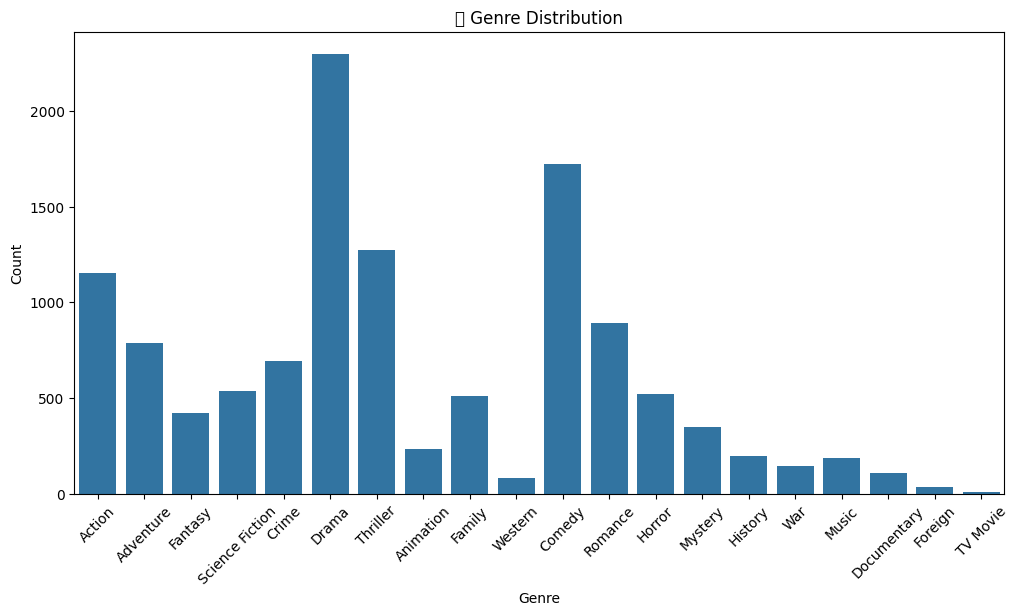

In [10]:
from collections import Counter
import pandas as pd
def get_genre_distribution(data):
    genre_list = [genre for sublist in data['genres'] for genre in sublist]
    return Counter(genre_list)

genre_df = pd.DataFrame(get_genre_distribution(data_processed).items(), columns=['Genre', 'Count'])
print(len(genre_df))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x='Genre', y='Count')
plt.title('🎬 Genre Distribution')
plt.xticks(rotation=45)
plt.show()